# Clusterização - Densidade

Veremos os seguintes algoritmos na pratica:
* DBSCAN
* OPTICS
* Misturas Gaussianas

In [11]:
from sklearn import datasets
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

### Carregamento dos dados

Iremos usar o dataset IRIS esse conjunto traz 150 amostras de três espécies de Iris (Iris setosa, Iris virginica e Iris versicolor) que, apesar de muito semelhantes, são passíveis de distinção usando um modelo desenvolvido pelo biólogo e estatístico Ronald Fisher.

Novamente não iremos realizar a normalização dos dados, mas lembre que tal tarefa é importante para a clusterização.

In [3]:
iris = datasets.load_iris()

In [4]:
# ajustando para dataframe
iris_data = iris.data
iris_target = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

In [5]:
iris_data[:2]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2]])

In [6]:
iris_target[:2]

array([0, 0])

In [7]:
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
np.unique(iris_target)

array([0, 1, 2])

In [10]:
# convertendo em dataframe
df_base = pd.DataFrame(data=iris_data, columns=feature_names)
# df_base['target'] = iris_target
df_base.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


---
# 1. DBSCAN

In [12]:
from sklearn.cluster import DBSCAN

#### Parâmetros da Função DBSCAN do Scikit-learn

O algoritmo DBSCAN (Density-Based Spatial Clustering of Applications with Noise) disponível no Scikit-learn é uma técnica de clusterização baseada em densidade. Abaixo estão os principais parâmetros da função `DBSCAN` fornecida pelo Scikit-learn:

1. **eps**: float, default=0.5
   - A distância máxima entre duas amostras para serem consideradas no mesmo neighborhood (vizinhança).

2. **min_samples**: int, default=5
   - O número mínimo de amostras necessárias em um neighborhood para considerar um ponto central.

3. **metric**: string ou callable, default='euclidean'
   - A métrica de distância utilizada para medir a similaridade entre pontos. Pode ser uma string ('euclidean', 'manhattan', 'cosine', etc.) ou uma função customizada.

4. **metric_params**: dict, default=None
   - Parâmetros adicionais específicos da métrica escolhida.

5. **algorithm**: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'
   - O algoritmo utilizado para computar as vizinhanças. 
     - 'auto': tenta determinar a melhor opção com base nos dados passados.
     - 'ball_tree' e 'kd_tree': são estruturas de dados para representar o conjunto de dados e facilitar a busca por vizinhos.
     - 'brute': usa força bruta para calcular as distâncias entre os pontos.

6. **leaf_size**: int, default=30
   - Tamanho da folha passado para a árvore se 'algorithm' for 'ball_tree' ou 'kd_tree'.

7. **p**: float, default=None
   - O parâmetro p para a métrica Minkowski. Se p não é especificado, será usado p=2 que é equivalente à distância euclidiana.

Esses são os principais parâmetros da função DBSCAN do Scikit-learn. Você pode ajustar esses parâmetros de acordo com suas necessidades e características dos seus dados para obter resultados adequados de clustering utilizando o algoritmo DBSCAN.

Se precisar de mais informações ou tiver outras dúvidas, estou à disposição para ajudar.

In [13]:
# define o modelo
model = DBSCAN(eps=0.30, min_samples=5)

In [14]:
# fita o modelo model
yhat =model.fit_predict(df_base)

In [15]:
yhat[0:10]

array([ 0,  0,  0,  0,  0, -1,  0,  0,  0,  0], dtype=int64)

In [16]:
# adicionando a coluna do dataframe
df_resultados = df_base.copy()
df_resultados["grupo"] = yhat
df_resultados.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),grupo
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [17]:
# Quantidade de clusters
clusters = np.unique(yhat)
clusters

array([-1,  0,  1,  2], dtype=int64)

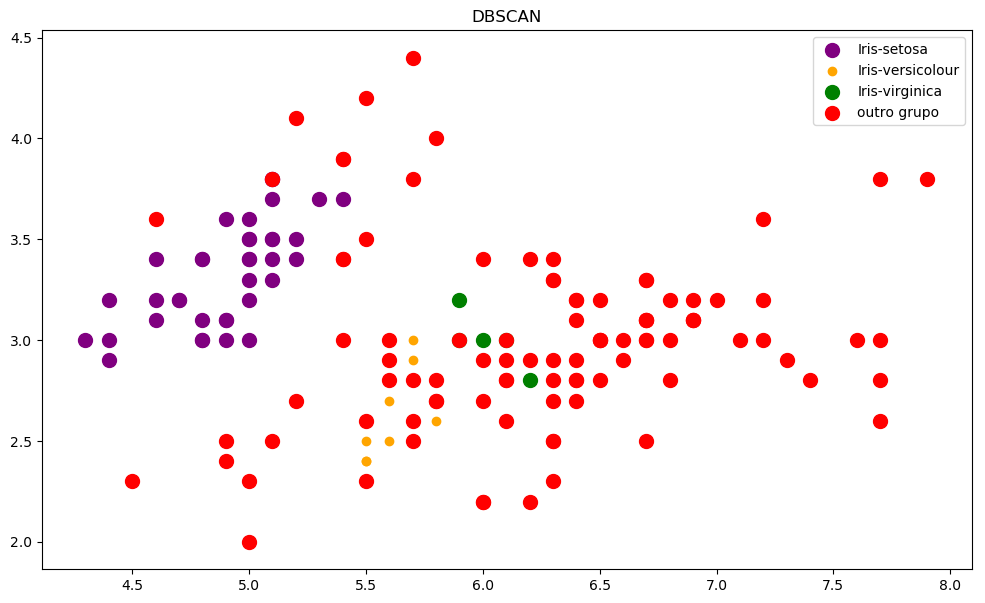

In [25]:
# visualizando
# lembrando que aqui temos 4 dimensoes, acabamos escolhendo apenas duas para ver
# futuramente iremos ver como podemos fazer a reducao de dimensionalidade
plt.figure(figsize=(12, 7))
plt.scatter(df_resultados.loc[df_resultados["grupo"] == 0, "sepal length (cm)"],
            df_resultados.loc[df_resultados["grupo"] == 0, "sepal width (cm)"],
              s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(df_resultados.loc[df_resultados["grupo"] == 1, "sepal length (cm)"],
            df_resultados.loc[df_resultados["grupo"] == 1, "sepal width (cm)"],
            c = 'orange', label = 'Iris-versicolour')
plt.scatter(df_resultados.loc[df_resultados["grupo"] == 2, "sepal length (cm)"],
            df_resultados.loc[df_resultados["grupo"] == 2, "sepal width (cm)"],
            s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(df_resultados.loc[df_resultados["grupo"] == -1, "sepal length (cm)"],
            df_resultados.loc[df_resultados["grupo"] == -1, "sepal width (cm)"],
            s = 100, c = 'red', label = 'outro grupo')
plt.title("DBSCAN")
plt.legend()
plt.show()

In [19]:
# vamos comparar com o Kmeans
from sklearn.cluster import KMeans

In [20]:
# define o modelo
model =  KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)

# fita o modelo model
yhat =model.fit_predict(df_base)

# adicionando a coluna do dataframe
df_resultados["kmeans"] = yhat
df_resultados.head(3)

c:\Users\gilbe\anaconda3\envs\fatec_ml\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),grupo,kmeans
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1


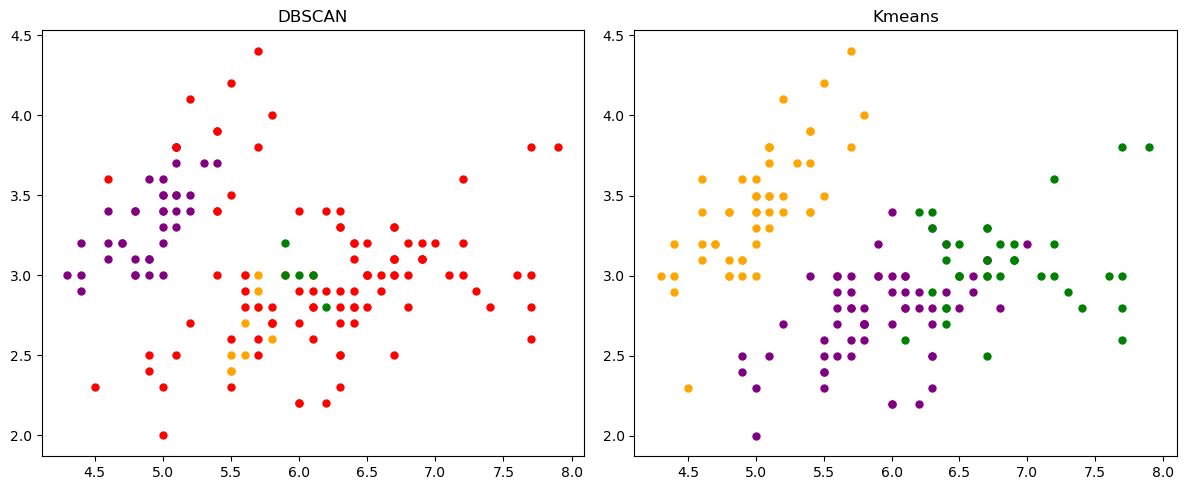

In [29]:
# plot
# visualização

# Criar a figura e os subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Scatterplot 1
axs[0].scatter(df_resultados.loc[df_resultados["grupo"] == 0, "sepal length (cm)"],
               df_resultados.loc[df_resultados["grupo"] == 0, "sepal width (cm)"],
              s = 25, c = 'purple', label = '0')
axs[0].scatter(df_resultados.loc[df_resultados["grupo"] == 1, "sepal length (cm)"],
               df_resultados.loc[df_resultados["grupo"] == 1, "sepal width (cm)"],
              s = 25, c = 'orange', label = '1')
axs[0].scatter(df_resultados.loc[df_resultados["grupo"] == -1, "sepal length (cm)"],
               df_resultados.loc[df_resultados["grupo"] == -1, "sepal width (cm)"],
              s = 25, c = 'red', label = '-1')
axs[0].scatter(df_resultados.loc[df_resultados["grupo"] == 2, "sepal length (cm)"],
               df_resultados.loc[df_resultados["grupo"] == 2, "sepal width (cm)"],
              s = 25, c = 'green', label = '2')
axs[0].set_title('DBSCAN')

# Scatterplot 2
axs[1].scatter(df_resultados.loc[df_resultados["kmeans"] == 0, "sepal length (cm)"],
               df_resultados.loc[df_resultados["kmeans"] == 0, "sepal width (cm)"],
              s = 25, c = 'purple', label = '0')
axs[1].scatter(df_resultados.loc[df_resultados["kmeans"] == 1, "sepal length (cm)"],
               df_resultados.loc[df_resultados["kmeans"] == 1, "sepal width (cm)"],
              s = 25, c = 'orange', label = '1')
axs[1].scatter(df_resultados.loc[df_resultados["kmeans"] == 2, "sepal length (cm)"],
               df_resultados.loc[df_resultados["kmeans"] == 2, "sepal width (cm)"],
              s = 25, c = 'green', label = '2')
axs[1].set_title('Kmeans')


# Ajustar o layout e exibir o gráfico
plt.tight_layout()
plt.show()

Na pratica rodamos diversas vezes o DBSCAN, mas é importante lembrar a grande sensibilidade do algoritmo em relação aos parametros.

---
# 2. OPTICS

In [30]:
from sklearn.cluster import OPTICS

In [32]:
%%time
# define o modelo
model_optics =  OPTICS()

# fita o modelo model
yhat =model_optics.fit_predict(df_base)

CPU times: total: 109 ms
Wall time: 111 ms


In [33]:

# adicionando a coluna do dataframe
df_resultados_optics = df_base.copy()
df_resultados_optics["grupo"] = yhat

In [35]:
# Quantidade de clusters
clusters = np.unique(yhat)
clusters

array([-1,  0,  1,  2,  3,  4,  5])

In [34]:
df_resultados_optics.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),grupo
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,0


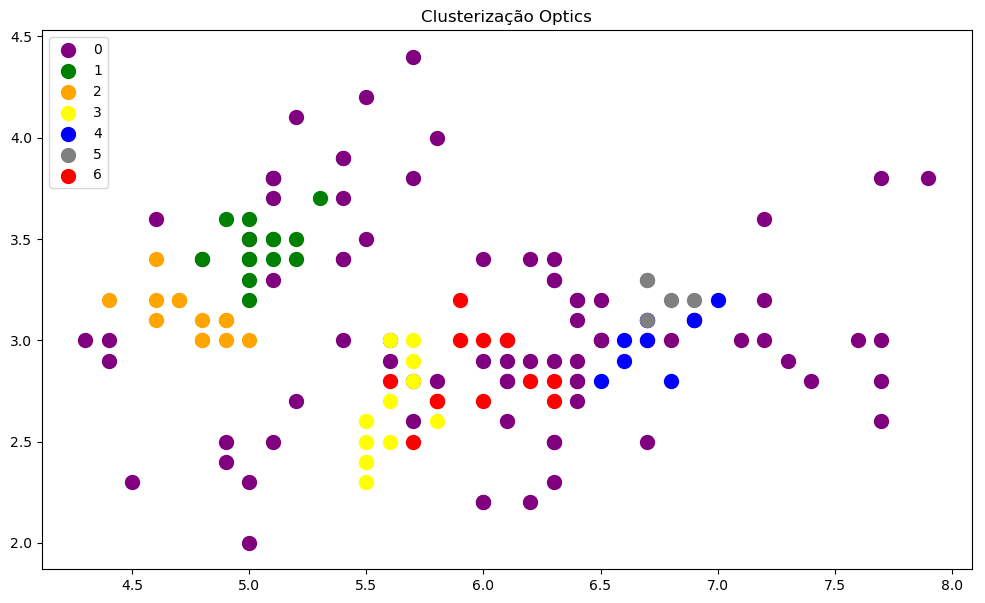

In [39]:
# visualizando
# lembrando que aqui temos 4 dimensoes, acabamos escolhendo apenas duas para ver
# futuramente iremos ver como podemos fazer a reducao de dimensionalidade
plt.figure(figsize=(12, 7))
cores = ["purple","green","orange","yellow","blue","grey","red","black"]
for i,j in enumerate(np.unique(yhat)):
  plt.scatter(df_resultados_optics.loc[df_resultados_optics["grupo"] == j, "sepal length (cm)"],
              df_resultados_optics.loc[df_resultados_optics["grupo"] == j, "sepal width (cm)"],
                s = 100, c = cores[i], label = i)

plt.title("Clusterização Optics")
plt.legend()
plt.show()

Assim vemos que foram criados mais grupos que os três que deveriam ter sido encontrados.

---
# 3. Misturas Gaussianas

In [41]:
from sklearn.mixture import GaussianMixture

In [42]:
%%time
# define o modelo
model_gauss = GaussianMixture(n_components=3)

# fita o modelo model
yhat =model_gauss.fit_predict(df_base)

CPU times: total: 281 ms
Wall time: 161 ms


c:\Users\gilbe\anaconda3\envs\fatec_ml\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [43]:
# adicionando a coluna do dataframe
df_resultados_gauss = df_base.copy()
df_resultados_gauss["grupo"] = yhat

In [44]:
# Quantidade de clusters
clusters = np.unique(yhat)
clusters

array([0, 1, 2], dtype=int64)

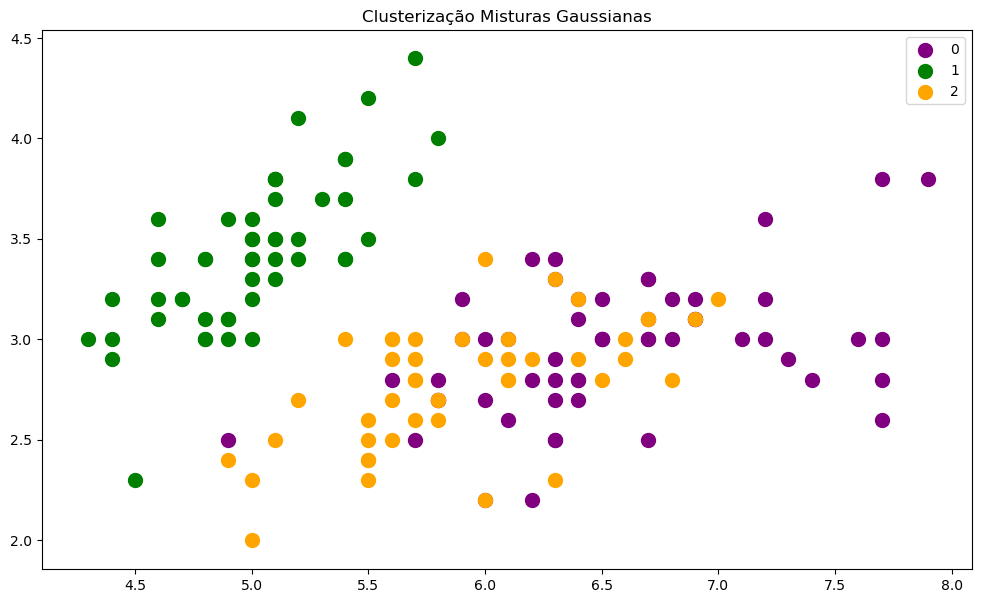

In [45]:
# visualizando
# lembrando que aqui temos 4 dimensoes, acabamos escolhendo apenas duas para ver
# futuramente iremos ver como podemos fazer a reducao de dimensionalidade
plt.figure(figsize=(12, 7))
cores = ["purple","green","orange","yellow","blue","grey","red","black"]
for i,j in enumerate(np.unique(yhat)):
  plt.scatter(df_resultados_gauss.loc[df_resultados_gauss["grupo"] == j, "sepal length (cm)"],
              df_resultados_gauss.loc[df_resultados_gauss["grupo"] == j, "sepal width (cm)"],
                s = 100, c = cores[i], label = i)

plt.title("Clusterização Misturas Gaussianas")
plt.legend()
plt.show()

Obtemos um resultado um pouco melhor.